<h1>Backtesting framework for automated strategies</h1>

<h1>Summary</h1>
<p>This project aims to build a backtesting framework for systematically built portfolios of stocks and options. Our general strategy is:
<ol>
<li>Automated exploratory data analysis and feature engineering (features derived from price, volume, lags, historical volatility, Natural Language Processing for sentiment analysis of unlabelled financial news data, PCA feature selection, etc.)</li>
<li>Predict the stock return for a number of days in the future using a suitable model (GBR, Lasso, etc. with tuned parameters) with the features from the previous step</li>
<li>Build a portfolio by buying or selling stocks and options if the forecast suggests a certain strategy will produce positive returns. E.g. long the stock and short a call in a covered call strategy.</li>
</ol>
At the moment, we only build portfolios of covered calls for a single symbol in a given time period.
</p>


In [1]:
# Import our class
from backtesting import *

# Create backtest. Automatically selects features and chooses parameters for prediction.
bt = Backtest(asset = "stock", asset_id = "MSFT", target="Close", period="max", days_to_pred = 2, num_lag_features = 5, hist_start_date = "2010-01-04", hist_end_date="2010-03-25", model_name='GBR', use_cv=True)

# Print MSE on train, validation and test sets
bt.score()

Training period: 2010-01-11 to 2010-02-02.
Validation period: 2010-02-03 to 2010-02-26.
Testing period: 2010-03-01 to 2010-03-23.
Train MSE is 7.363455983215529
Validation MSE is 0.27543407205714815
Test MSE is 2.6013239945800546


<p>The mean squared error on the train, validation and test data is obtained by calling the score() function on the Backtest object. It can be useful to check whether our model overfits and when comparing two different models. We also plan to implement other relevant metrics such as the sharp ratio.</p>

<p>We next test our systematic portfolio.</p>

In [2]:
# Build and test covered call portfolio
bt.test_systematic_portfolio()

By investing $23.035959243774414 in MSFT using the covered call strategy between 2010-03-17 and 2010-03-23, the portfolio makes $6.7765324438553165 - a 29.42% return.


<p>In practice, the returns would be significantly lower due to the transaction costs. We, however, do not have access to that information.</p>

<h1>Additional functionalities</h1>
<p>We visualize the backtest as follows.</p>

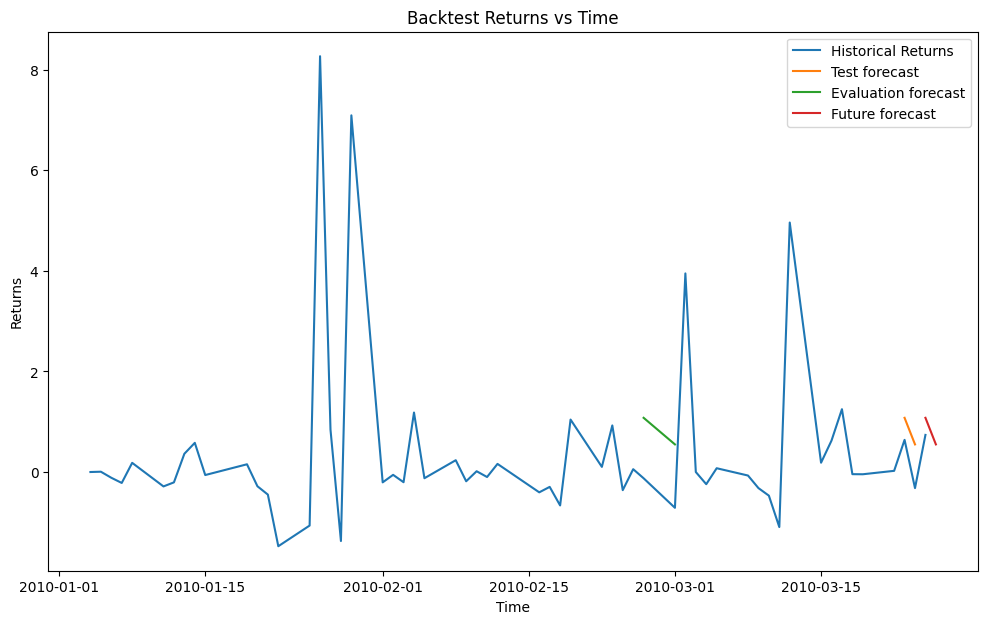

In [3]:
# Set up a figure
bt.create_ax_fig()
# Plot historical stock return
bt.plot_historical()
# Plot Test forecast on same plot as historical return for visual comparison
bt.plot_backtest()
# Plot future forecast on same plot
bt.plot_future_prediction()
# Call plt.show()
bt.plot_all()

<p> Part of the reason the predicted curves do not match exactly with the historical price is that the features and the target are standardized using their mean and standard deviation on the training period to improve the learning, and we subsequently perform an inverse transformation still using the training period means and standard deviations.</p>

<p>The mean squared error on the train, validation and test data is obtained by calling the score() function on the Backtest object. It can be useful to check whether our model overfits and when comparing two different models. We also plan to implement other relevant metrics such as the sharp ratio.</p>

<p> We compute and plot the Value-at-Risk (VaR) as follows. </p>

Latest 95% VaR is 2.84


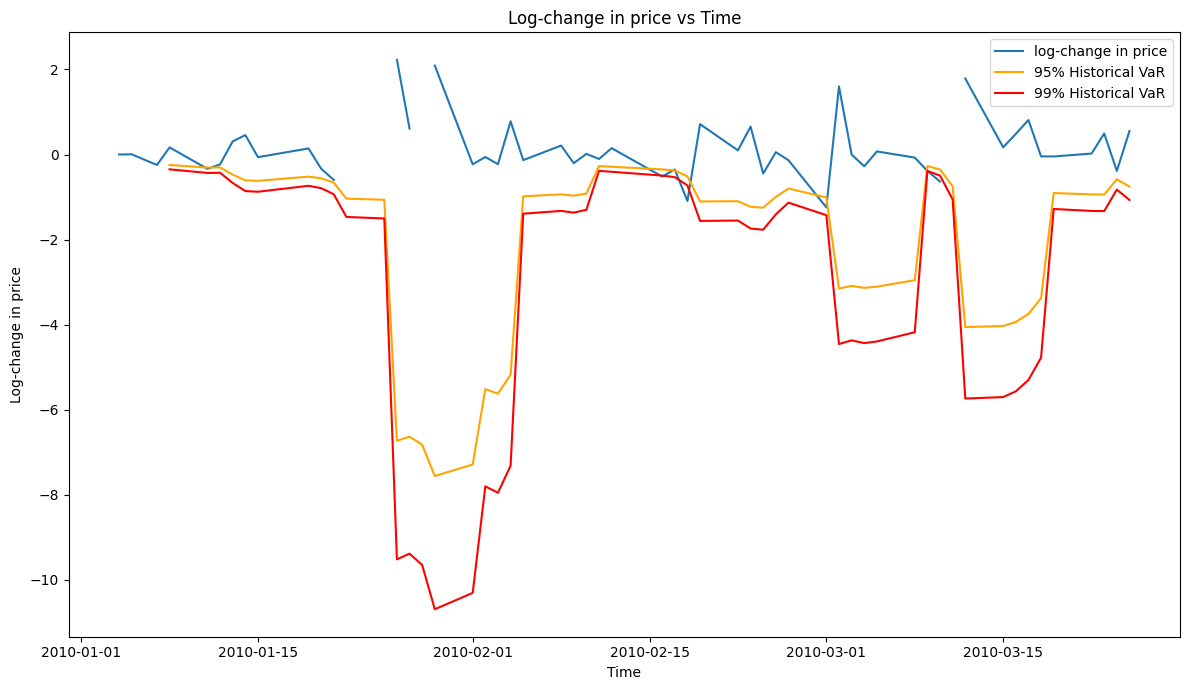

In [4]:
# Compute VaR
v = VaR(bt.price)
v.get_single_stock_VaR()
# Plot log change and VaR
v.plot_log_change_and_VaR()

<p>In the next cell, we compute the historical volatility.</p>

Lastest historical volatility is 10.60%


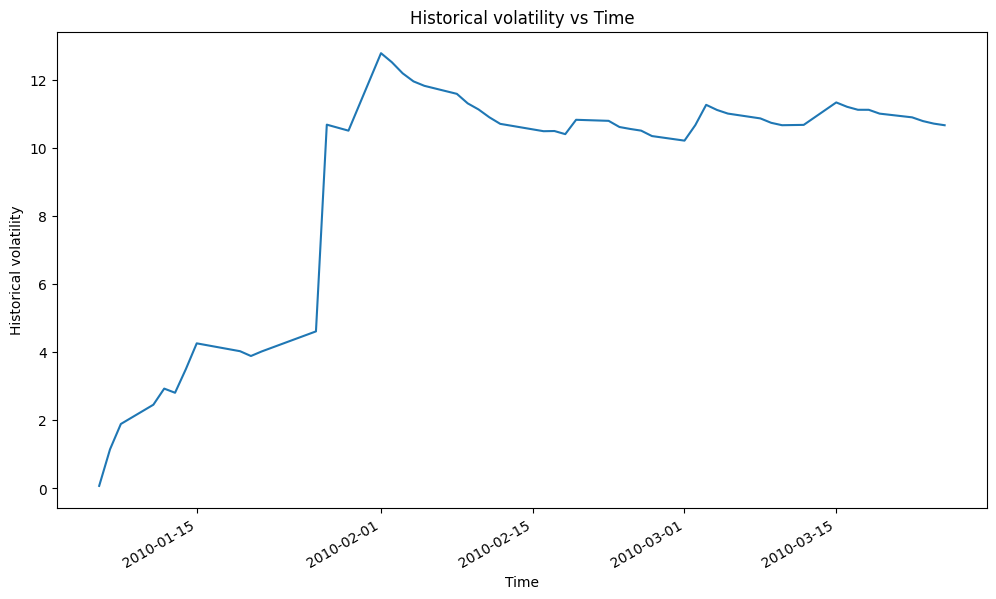

In [5]:
# Compute and plot historical volatility:
vol = Volatility(bt.price)
print("Lastest historical volatility is {:.2f}%".format(vol.get_historical_volatility()))
vol.plot_historical_volatility()

<p>Given the market price of an option, we compute the implied volatility as follows.</p>

In [6]:
print("Implied Volatility is {:.2f}%".format(100*vol.get_implied_volatility(S_0=100, OP_obs=1, K=100, T=30, r=0.05, option_type = "call")))

Implied Volatility is 6.81%
